#Home Price Prediction - Less Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_csv("homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [ ]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
reg.intercept_

221323.00186540396

In [ ]:
reg.predict([[3000,4,15]])

array([602590.07937407])

In [ ]:
112.06244194*3000 + 23388.88007794*4 + -3231.71790863*15 + 221323.00186540396

602590.079367714

In [ ]:
reg.predict([[2500,4,5]])

array([578876.03748933])

#Home Price Prdeiction - With Larger Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
df_kc = pd.read_csv("kc_house_data.csv")
df_kc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df_kc.isnull().values.any()

False

In [6]:
df_model = df_kc.copy()
df_model = df_model.drop(['id', 'date','waterfront','view','lat','long'], axis=1)

In [9]:
from sklearn.model_selection import train_test_split
X = df_model.drop(['price'], axis=1)
Y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 43)
X_train.shape, X_test.shape

((15129, 14), (6484, 14))

In [14]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lrprediction = lr.predict(X_test)

In [12]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()
rfg.fit(X_train, y_train)
rfgprediction = rfg.predict(X_test)

In [15]:
from sklearn.metrics import r2_score
print(r2_score(y_test, lrprediction))
print(r2_score(y_test, rfgprediction))

0.5953000989325643
0.7791220268082792


In [22]:
lr.predict([[3,2,2500,7000,2,3,7,1860,400,1950,2010, 98125,1700,7500]])

array([652076.75858059])

In [23]:
rfg.predict([[3,2,2500,7000,2,3,7,1860,400,1950,2010, 98125,1700,7500]])

array([579169.79])

In [27]:
dict(zip(X.columns, rfg.feature_importances_))

{'bathrooms': 0.021337872936533834,
 'bedrooms': 0.007258642025223641,
 'condition': 0.006351625496007454,
 'floors': 0.004624558012288604,
 'grade': 0.3555800373243166,
 'sqft_above': 0.02396805140949676,
 'sqft_basement': 0.011694928448469264,
 'sqft_living': 0.28127677555018105,
 'sqft_living15': 0.05225500810050371,
 'sqft_lot': 0.028376415030859758,
 'sqft_lot15': 0.03353323515760626,
 'yr_built': 0.08614713055017016,
 'yr_renovated': 0.004343563509746665,
 'zipcode': 0.08325215644859617}

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


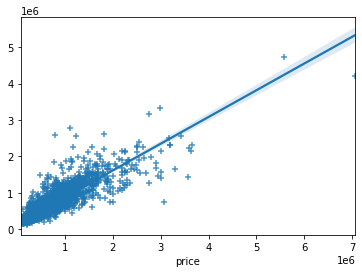

In [29]:
import seaborn as sns
sns.regplot(y_test, rfgprediction, marker='+')